In [1]:
import pandas as pd # Tuodaan pandas-kirjasto.
import matplotlib.pyplot as plt # Tuodaan kuvioiden ja kaavioiden peruskirjasto.
import seaborn as sns # Tuodaan seaborn-kirjasto.
# Tällä komennolla kaaviot saadaan tulostumaan automaattisesti ilman erillistä komentoa.
%matplotlib inline 

plt.style.use('seaborn-whitegrid') # Kaavioiden ulkoasun tyyli.

In [2]:
df = pd.read_csv('http://taanila.fi/employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df = df.drop('DailyRate', axis=1)
df = df.drop('DistanceFromHome', axis=1)
df = df.drop('EmployeeCount', axis=1)
df = df.drop('EmployeeNumber', axis=1)
df = df.drop('JobInvolvement', axis=1)
df = df.drop('StandardHours', axis=1)
df = df.drop('TrainingTimesLastYear', axis=1)
df = df.drop('WorkLifeBalance', axis=1)
df = df.drop('YearsInCurrentRole', axis=1)
df = df.drop('YearsSinceLastPromotion', axis=1)
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('MonthlyRate', axis=1)
df = df.drop('EnvironmentSatisfaction', axis=1)
df = df.drop('JobSatisfaction', axis=1)
df = df.drop('StockOptionLevel', axis=1)
df = df.drop('RelationshipSatisfaction', axis=1)
df = df.drop('Education', axis=1)
df = df.drop('NumCompaniesWorked', axis=1)

In [4]:
# Korrelaatiokertoimet, joista nähdään muuttujien välinen riippuvuus.
# Mitä lähempänä kerroin on arvoa 1, sitä suurempi positiivinen riippuvuus on kyseessä.
# Mitä lähempänä kerroin on arvoa -1, sitä suurempi negatiivinen riippuvuus on kyseessä.
df.corr()

,Age,HourlyRate,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany
Age,1.000000,0.024287,0.509604,0.497855,0.003634,0.001904,0.680381,0.311309
HourlyRate,0.024287,1.000000,-0.027853,-0.015794,-0.009062,-0.002172,-0.002334,-0.019582
JobLevel,0.509604,-0.027853,1.000000,0.950300,-0.034730,-0.021222,0.782208,0.534739
MonthlyIncome,0.497855,-0.015794,0.950300,1.000000,-0.027269,-0.017120,0.772893,0.514285
PercentSalaryHike,0.003634,-0.009062,-0.034730,-0.027269,1.000000,0.773550,-0.020608,-0.035991
PerformanceRating,0.001904,-0.002172,-0.021222,-0.017120,0.773550,1.000000,0.006744,0.003435
TotalWorkingYears,0.680381,-0.002334,0.782208,0.772893,-0.020608,0.006744,1.000000,0.628133
YearsAtCompany,0.311309,-0.019582,0.534739,0.514285,-0.035991,0.003435,0.628133,1.000000


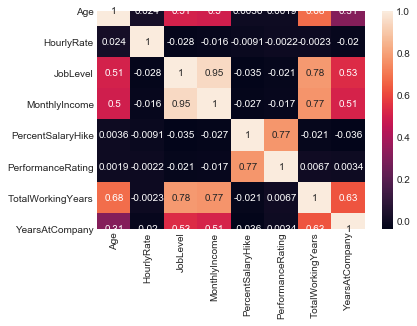

In [5]:
# Seaborn-kirjaston heatmap väritää korrelaatiokertoimia
sns.heatmap(df.corr(), annot=True)

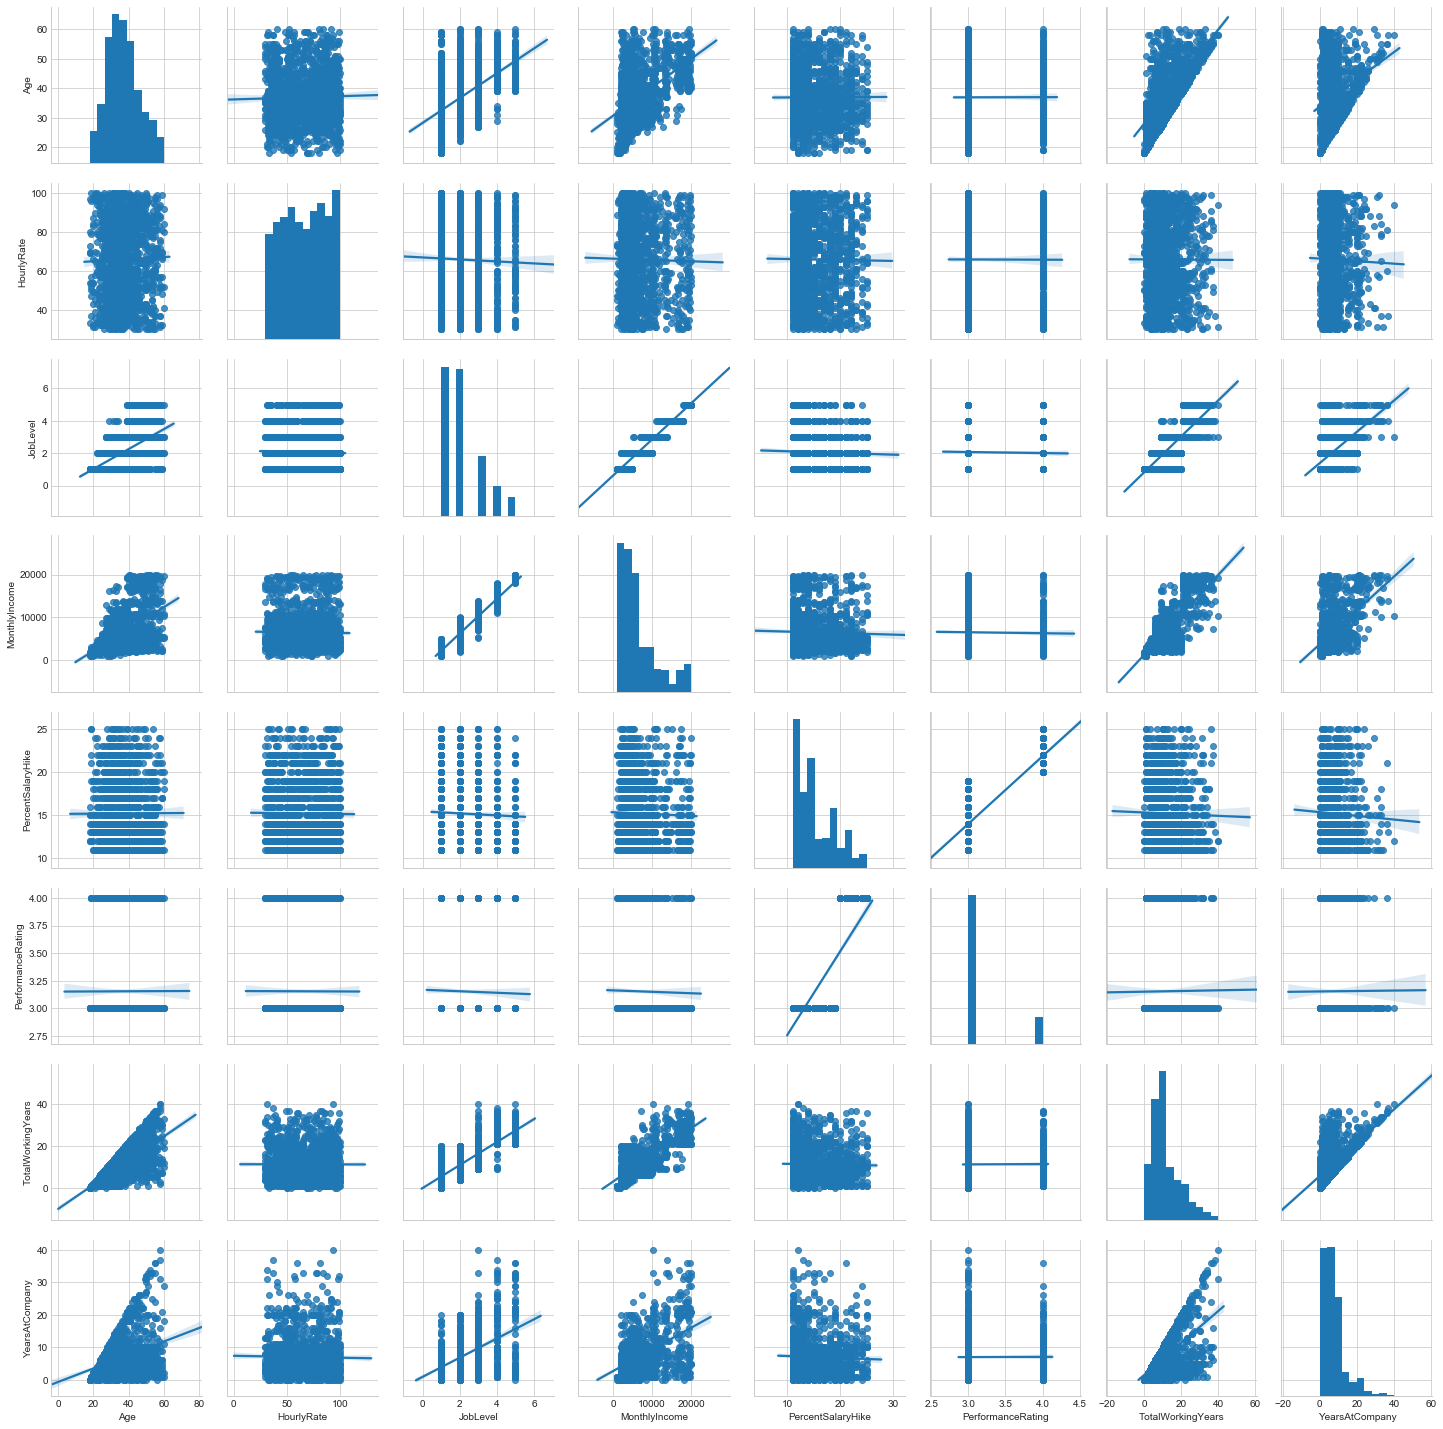

In [6]:
# Korrelaatioiden visuaalinen tarkastelu hajontakaavioina
sns.pairplot(df, kind='reg')

In [7]:
from scipy.stats import pearsonr
for var in df:
    print(var, pearsonr(df['TotalWorkingYears'], df[var]))

Age (0.6803805357911983, 2.1647185771614938e-200)


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')